<a href="https://colab.research.google.com/github/manasi-sh/Steganalysis_CNN/blob/main/Steganalysis_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the Kaggle API
!pip install kaggle

# Upload your Kaggle API key file (kaggle.json) from the Downloads folder
from google.colab import files

# Upload the Kaggle API key file from the Downloads folder
uploaded = files.upload()

# Move the uploaded Kaggle API key to the correct directory
import shutil

# Get the uploaded file name
key_filename = list(uploaded.keys())[0]

# Create the .kaggle directory if it doesn't exist
!mkdir -p /root/.kaggle

# Move the uploaded Kaggle API key to the .kaggle directory
shutil.move(key_filename, '/root/.kaggle/kaggle.json')
!chmod 600 /root/.kaggle/kaggle.json

# Download the dataset2
!kaggle datasets download vishakhaisstressed/dataset2

# Unzip the downloaded files
!unzip -q dataset2.zip -d dataset2

# List the files in the dataset directory
!ls dataset2


Saving kaggle.json to kaggle.json
 97% 659M/676M [00:07<00:00, 109MB/s]
100% 676M/676M [00:07<00:00, 99.4MB/s]
cover1	stego1


In [ ]:
import keras
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
# from keras.layers.core import Dense, Dropout, Activation, Flatten
# from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D
from keras.preprocessing import image
from keras.utils import to_categorical
# from tensorflow.python.keras.callbacks import TensorBoard
# from keras.preprocessing.image import ImageDataGenerator
# from time import time
from PIL import Image
import cv2


In [ ]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# import os
# import numpy as np
# from PIL import Image

# Set the directories to the image and label folders
image_directory1 = '/content/dataset2/stego1'
image_directory2 = '/content/dataset2/cover1'

# List the image filenames and store them in `filenames`
filenames1 = [f for f in os.listdir(image_directory1) if f.endswith('.jpg') or f.endswith('.png')]
filenames2 = [f for f in os.listdir(image_directory2) if f.endswith('.jpg') or f.endswith('.png')]
# Create empty lists to store flattened images and their corresponding labels
images = []
labels = []

# Loop through each image filename
for filename in filenames1:
    # Load the image
    img = Image.open(os.path.join(image_directory1, filename))
    img = np.array(img)
    img = cv2.resize(img, (256, 256))

    # Flatten the image into a 1D array and store it in `images`
    image = np.array(img).flatten()
    images.append(image)

    # Load the corresponding label from the text file

    label = "STEGO"
    labels.append(label)

for filename in filenames2:
    # Load the image
    img = Image.open(os.path.join(image_directory2, filename))
    img = np.array(img)
    img = cv2.resize(img, (256, 256))

    # Flatten the image into a 1D array and store it in `images`
    image = np.array(img).flatten()
    images.append(image)

    # Load the corresponding label from the text file

    label = "COVER"
    labels.append(label)

# Convert the `images` and `labels` lists into numpy arrays
X = np.array(images)
y = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Number of total images: ", X_train.shape[0])
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

Number of total images:  2820
X_train shape:  (2820, 196608)
y_train shape:  (2820,)


In [ ]:
# # Assuming X_train is a flattened array with shape (num_samples, flattened_size)
# image_height, image_width = int(np.sqrt(X_train.shape[1])), int(np.sqrt(X_train.shape[1]))
# X_train = X_train.reshape(-1, image_height, image_width, 1)

# image_height, image_width = int(np.sqrt(X_test.shape[1])), int(np.sqrt(X_test.shape[1]))
# X_test = X_test.reshape(-1, image_height, image_width, 1)
image_height, image_width = 256, 256
X_train = X_train.reshape(-1, image_height, image_width, 3)
X_test = X_test.reshape(-1, image_height, image_width, 3)



In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train sample:", X_train[0])  # Print a sample image
print("y_train sample:", y_train[0])  # Print the corresponding label


X_train shape: (2820, 256, 256, 3)
y_train shape: (2820,)
X_train sample: [[[ 26  39  45]
  [ 26  39  45]
  [ 24  37  43]
  ...
  [ 29  37  40]
  [ 30  38  41]
  [ 31  39  42]]

 [[ 26  39  45]
  [ 26  39  45]
  [ 25  38  44]
  ...
  [ 29  37  40]
  [ 29  37  40]
  [ 30  38  41]]

 [[ 26  39  45]
  [ 26  39  45]
  [ 26  39  45]
  ...
  [ 29  37  40]
  [ 30  38  41]
  [ 31  39  42]]

 ...

 [[ 33  39  41]
  [ 35  40  42]
  [ 40  45  47]
  ...
  [122 123 123]
  [121 122 121]
  [ 99 100  99]]

 [[ 35  37  38]
  [ 40  41  41]
  [ 42  38  40]
  ...
  [ 76  71  87]
  [ 60  55  70]
  [ 65  60  75]]

 [[ 33  40  38]
  [ 33  34  34]
  [ 48  43  45]
  ...
  [116 119 122]
  [ 93  97  99]
  [102 105 108]]]
y_train sample: STEGO


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert labels to numerical values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

# Convert numerical values to one-hot encoding
y_train_one_hot = to_categorical(y_train_encoded, num_classes=2)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=2)



In [ ]:
from keras import regularizers
from keras.optimizers import Adam
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Add dropout layer
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #Increase Model Complexity
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Add dropout layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #Weight Regularization
model.add(layers.Dropout(0.5))  # Add dropout layer
model.add(layers.Dense(2, activation='softmax'))

optimizer = Adam(learning_rate=0.001) #Adjust Learning Rate
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_one_hot, epochs=30, batch_size=64, validation_data=(X_test, y_test_one_hot))


Epoch 1/30
45/45 [==============================] - 556s 12s/step - loss: 181.5412 - accuracy: 0.4954 - val_loss: 4.7775 - val_accuracy: 0.5283
Epoch 2/30
45/45 [==============================] - 561s 12s/step - loss: 4.6287 - accuracy: 0.5004 - val_loss: 4.4286 - val_accuracy: 0.4688
Epoch 3/30
45/45 [==============================] - 559s 12s/step - loss: 4.2589 - accuracy: 0.4957 - val_loss: 4.0845 - val_accuracy: 0.4688
Epoch 4/30
45/45 [==============================] - 561s 12s/step - loss: 3.9448 - accuracy: 0.5000 - val_loss: 3.7989 - val_accuracy: 0.4703
Epoch 5/30
45/45 [==============================] - 559s 12s/step - loss: 3.6778 - accuracy: 0.5046 - val_loss: 3.5528 - val_accuracy: 0.4731
Epoch 6/30
45/45 [==============================] - 558s 12s/step - loss: 3.4489 - accuracy: 0.5064 - val_loss: 3.3391 - val_accuracy: 0.4688
Epoch 7/30
45/45 [==============================] - 560s 12s/step - loss: 3.2476 - accuracy: 0.5128 - val_loss: 3.1528 - val_accuracy: 0.4717
Epoc

In [ ]:
training_accuracy = model.evaluate(X_train, y_train_one_hot)[1]
test_accuracy = model.evaluate(X_test, y_test_one_hot)[1]
print(training_accuracy)
print(test_accuracy)

23/23 [==============================] - 37s 2s/step - loss: 2.4097 - accuracy: 0.4731
0.5078014135360718
0.4730878174304962


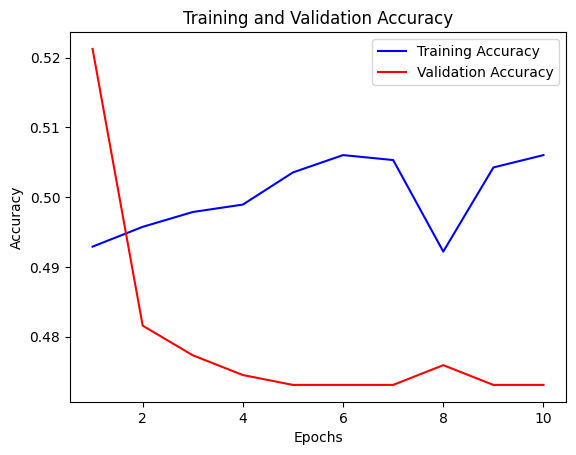

In [ ]:
#plot graph
import matplotlib.pyplot as plt

# Assuming you have trained your model and obtained a history object

# Extract accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


In [ ]:
def predict_image(model, img_path):
    img = Image.open(img_path)
    img = np.array(img)
    img = cv2.resize(img, (256, 256))
    img = img.reshape(1, 256, 256, 3)
    prediction = model.predict(img)
    print("Predicting: ", prediction)
    predicted_class = np.argmax(prediction)
    print(predicted_class)
    if predicted_class == 0:
        print("Predicted image is COVER IMAGE")
    else:
        print("Predicted image is STEGO IMAGE")
    # Assuming you have trained your model and obtained predictions in a variable named 'predictions'
# predictions = model.predict(X)

# Get the predicted classes for each sample
    predicted_classes = np.argmax(prediction, axis=1)

    # Get the unique values in the true labels (y) and the predicted classes
    unique_true_labels = np.unique(y)
    unique_predicted_classes = np.unique(predicted_classes)

    # Print the mapping between predicted classes and actual labels
    for predicted_class in unique_predicted_classes:
        corresponding_label = unique_true_labels[predicted_class]
        print(f"Predicted class {predicted_class} corresponds to label '{corresponding_label}'") #0 is cover and 1 is stego


In [ ]:
img_path = "/content/cover_img.jpg"
predict_image(model, img_path)

1/1 [==============================] - 0s 198ms/step
Predicting:  [[0.50427574 0.49572426]]
0
Predicted image is COVER IMAGE
Predicted class 0 corresponds to label 'COVER'


In [ ]:
img_path = "/content/hidden_cover_img.jpg"
predict_image(model, img_path)

1/1 [==============================] - 0s 101ms/step
Predicting:  [[0.50427574 0.49572426]]
0
Predicted image is COVER IMAGE
Predicted class 0 corresponds to label 'COVER'


In [ ]:
#2nd approach
import os
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense
import tensorflow.keras.optimizers as keras_optimizers

In [ ]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.loss =[] # loss at given epoch

    def on_epoch_begin(self,epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        self.acc.append(logs.get('acc'))
        self.loss.append(logs.get('loss'))
        #add validation accuracy and loss
        # self.model.save('./models-epoch/jsteg-%d.h5' %epoch)

        # save images every epoch
        plt.plot(self.acc)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        # plt.savefig("plots/jsteg-%d.png" %epoch) # saves the rate as an image



In [ ]:
def create_model(image_size):
    model = Sequential()
    model.add(Conv2D(1, (3, 3), input_shape=(image_size, image_size, 3)))
    model.add(Activation('tanh'))
    model.add(Conv2D(64, (254, 254)))
    model.add(Activation('tanh'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return model

def train_model(model, X_train, y_train_one_hot, X_test, y_test_one_hot):
    sgd = keras_optimizers.SGD(learning_rate=0.005, momentum=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    history = model.fit(X_train, y_train_one_hot, batch_size=32, validation_data=(X_test, y_test_one_hot),
                        epochs=20, shuffle=True)
    return model, history

def evaluate_model(model, X_test, y_test_one_hot):
    score = model.evaluate(X_test, y_test_one_hot, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.savefig("jsteg.png")
    plt.show()

def predict_image(model, img_path):
    img = Image.open(img_path)
    img = np.array(img)
    img = cv2.resize(img, (256, 256))
    img = img.reshape(1, 256, 256, 3)
    prediction = model.predict(img)
    print("Predicting: ", prediction)
    predicted_class = np.argmax(prediction)
    print(predicted_class)
    if predicted_class == 0:
        print("Predicted image is COVER IMAGE")
    else:
        print("Predicted image is STEGO IMAGE")

Epoch 1/20
89/89 [==============================] - 67s 752ms/step - loss: 0.7835 - accuracy: 0.5110 - val_loss: 0.6928 - val_accuracy: 0.5255
Epoch 2/20
89/89 [==============================] - 67s 760ms/step - loss: 0.6950 - accuracy: 0.4972 - val_loss: 0.7219 - val_accuracy: 0.4745
Epoch 3/20
89/89 [==============================] - 63s 709ms/step - loss: 0.6950 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5241
Epoch 4/20
89/89 [==============================] - 62s 689ms/step - loss: 0.6948 - accuracy: 0.4975 - val_loss: 0.7223 - val_accuracy: 0.4745
Epoch 5/20
89/89 [==============================] - 62s 699ms/step - loss: 0.6954 - accuracy: 0.5071 - val_loss: 0.6931 - val_accuracy: 0.5241
Epoch 6/20
89/89 [==============================] - 63s 701ms/step - loss: 0.6951 - accuracy: 0.4947 - val_loss: 0.6928 - val_accuracy: 0.5241
Epoch 7/20
89/89 [==============================] - 69s 775ms/step - loss: 0.6947 - accuracy: 0.5021 - val_loss: 0.6934 - val_accuracy: 0.4773

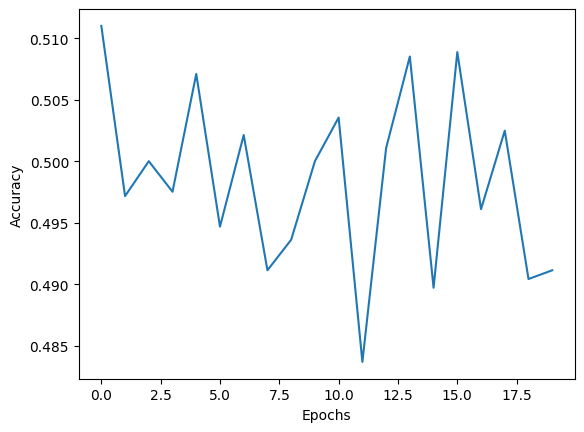

In [ ]:
image_size = 256
path = os.getcwd()
bs = 32  # batch size

# Load and preprocess your dataset (X_train, y_train_one_hot, X_test, y_test_one_hot)

model = create_model(image_size)
model, history = train_model(model, X_train, y_train_one_hot, X_test, y_test_one_hot)

evaluate_model(model, X_test, y_test_one_hot)
plot_accuracy(history)


In [ ]:
training_accuracy = model.evaluate(X_train, y_train_one_hot)[1]
test_accuracy = model.evaluate(X_test, y_test_one_hot)[1]
print(training_accuracy)
print(test_accuracy)

23/23 [==============================] - 4s 170ms/step - loss: 0.6949 - accuracy: 0.4731
0.5078014135360718
0.4730878174304962


In [ ]:
img_path = "/content/hidden_cover_img.jpg"
predict_image(model, img_path)

1/1 [==============================] - 0s 237ms/step
Predicting:  [[0.50371826 0.49628168]]
0
Predicted image is COVER IMAGE


In [ ]:
img_path = "/content/cover_img.jpg"
predict_image(model, img_path)

1/1 [==============================] - 0s 30ms/step
Predicting:  [[0.50371784 0.49628216]]
0
Predicted image is COVER IMAGE
